In [2]:
import json
from pathlib import Path

import numpy as np
import pandas as pd


import IPython.display as ipd
import librosa
import librosa.display
import librosa.feature
import matplotlib.pyplot as plt
from PIL import Image

plt.rcParams['figure.figsize'] = [20, 10]
plt.rcParams['figure.dpi'] = 100

ROOT_PATH = Path("..")

In [3]:
full_df = pd.read_csv(ROOT_PATH / "data/raw/metadata.csv")
# ids for which we have audio <20s
# ids = pd.read_json(ROOT_PATH / "data/raw/filter_ids.json").squeeze()
ids = pd.read_json(ROOT_PATH / "data/raw/song_vs_call.json").squeeze()
df = full_df.loc[full_df.id.isin(ids)].copy()

# turn type into set
type_col = df.type.str.lower().str.replace(" ", "").str.split(",")
df['has_call'] = type_col.apply(lambda l: "call" in l).astype(int)

In [4]:
df.has_call.value_counts()

1    3181
0    2619
Name: has_call, dtype: int64

In [105]:
filt_df = df.loc[(df.en=='Black-capped Chickadee') & (df.has_call==1)]

In [6]:
filt_df = df.loc[(df.en=='Song Sparrow') & (df.has_call==1)]
filt_df

,id,gen,sp,ssp,en,rec,cnt,loc,lat,lng,...,q,length,time,date,uploaded,also,rmk,bird-seen,playback-used,has_call
37986,585148,Melospiza,melodia,NaN,Song Sparrow,Paul Marvin,United States,"Otay Lakes, San Diego Co., California",32.62870,-116.9230,...,A,0:11,08:10,2020-08-19,2020-08-28,[''],it flew in calling and continued to call after...,yes,no,1
38021,549598,Melospiza,melodia,NaN,Song Sparrow,Bruce Lagerquist,United States,"Thornton Creek Ravine, Seattle, King County, W...",47.70220,-122.3088,...,A,0:13,06:16,2020-04-19,2020-04-24,"['Sitta canadensis', 'Dryobates pubescens', 'T...",Bird darting in and out of undergrowth and rot...,yes,no,1
38106,349555,Melospiza,melodia,NaN,Song Sparrow,Matt Wistrand,United States,"Jon J Duerr Forest Preserve, Kane County, Illi...",41.97310,-88.2988,...,A,0:15,06:15,2016-05-20,2017-01-08,[''],Same individual as XC349554.,yes,no,1
38118,307660,Melospiza,melodia,NaN,Song Sparrow,J.R. Rigby,United States,"Oxford, Lafayette County, Mississippi",34.48420,-89.5949,...,A,0:13,09:00,2015-11-19,2016-03-19,['Branta canadensis'],Natural sound. \r\n\r\n#Habitat#\r\nState wate...,yes,no,1
38120,301851,Melospiza,melodia,NaN,Song Sparrow,Ted Floyd,United States,"Lafayette, Boulder, Colorado",39.99760,-105.1179,...,A,0:08,07:47,2016-01-31,2016-02-01,[''],"A Song Sparrow at Greenlee Preserve, Lafayette...",yes,no,1
38123,293818,Melospiza,melodia,NaN,Song Sparrow,Jim Holmes,United States,"Eufaula, Barbour County, Alabama",31.98360,-85.0799,...,A,0:07,12:00,2015-11-23,2015-12-06,[''],NaN,unknown,no,1
38130,287881,Melospiza,melodia,NaN,Song Sparrow,J.R. Rigby,United States,"Oxford, Lafayette County, Mississippi",34.48420,-89.5949,...,A,0:17,13:00,2015-10-28,2015-10-30,[''],Bird flushed from beneath an observation deck ...,yes,no,1
38157,178318,Melospiza,melodia,NaN,Song Sparrow,Eric Cannizzaro,United States,"Olympia, Thurston County, Washington",47.05330,-122.9579,...,A,0:17,20:00,2014-05-13,2014-05-16,"['Turdus migratorius', 'Melospiza melodia', 'C...",Skulky behavoir.,yes,no,1
38171,149410,Melospiza,melodia,kenaiensis,Song Sparrow,Andrew Spencer,United States,"Homer Spit, Kenai Peninsula, Alaska",59.60800,-151.4325,...,A,0:09,09:30,2013-05-21,2013-10-01,[''],various calls from one of a pair in response t...,yes,no,1
38236,98066,Melospiza,melodia,NaN,Song Sparrow,Ryan P. O'Donnell,United States,"Benson, Cache County, Utah",41.78700,-111.9240,...,A,0:06,12:19,2012-04-05,2012-04-06,[''],NaN,unknown,unknown,1


In [7]:
filt_df = df.loc[(df.en=='Song Sparrow') & (df.has_call==0)]
filt_df

,id,gen,sp,ssp,en,rec,cnt,loc,lat,lng,...,q,length,time,date,uploaded,also,rmk,bird-seen,playback-used,has_call
37971,613797,Melospiza,melodia,NaN,Song Sparrow,Sue Riffe,United States,"Oso Flaco Lake, Nipomo, California",35.0307,-120.6205,...,A,0:09,7:55,2019-09-27,2021-01-08,['Dryobates nuttallii'],natural vocalization from riparian edge,yes,no,0
38003,574080,Melospiza,melodia,NaN,Song Sparrow,Adam Sell,United States,"Lyon's Woods Forest Preserve, Lake County, Ill...",42.4050,-87.8329,...,A,0:07,06:30,2020-07-06,2020-07-07,[''],NaN,yes,no,0
38005,572852,Melospiza,melodia,NaN,Song Sparrow,Bobby Wilcox,United States,"Davis Creek Regional Park, Washoe County, Nevada",39.3025,-119.8330,...,A,0:19,10:30,2020-06-30,2020-07-02,[''],about 5m away near a pond surrounded by willow...,no,no,0
38019,554248,Melospiza,melodia,NaN,Song Sparrow,Bobby Wilcox,United States,Cibola National Wildlife Refuge (near Cibola)...,33.3543,-114.6935,...,A,0:07,07:30,2020-05-04,2020-05-04,[''],about 15m away in marshy canal.,yes,no,0
38049,466633,Melospiza,melodia,NaN,Song Sparrow,Anthony Gliozzo,United States,"Mount Vernon, Skagit County, Washington",48.3252,-122.3770,...,A,0:13,18:00,2019-04-12,2019-04-14,[''],"perched high, stood below and up close",yes,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38492,79634,Melospiza,melodia,NaN,Song Sparrow,Mike Nelson,United States,"Cove Lake State Park, Caryville, Tenessee",36.3078,-84.2189,...,B,0:13,12:20pm,2011-06-01,2011-06-03,['Dumetella carolinensis'],NaN,yes,no,0
38493,79633,Melospiza,melodia,NaN,Song Sparrow,Mike Nelson,United States,"Cove Lake State Park, Caryville, Tenessee",36.3078,-84.2189,...,B,0:16,12:15pm,2011-06-01,2011-06-03,['Agelaius phoeniceus'],NaN,yes,no,0
38502,60066,Melospiza,melodia,melodia,Song Sparrow,Mike Nelson,United States,"Knoxville, Tennessee",35.8589,-84.0948,...,B,0:04,8:30am,2010-08-04,2010-08-18,[''],NaN,yes,no,0
38503,54422,Melospiza,melodia,melodia,Song Sparrow,Mike Nelson,United States,"Knoxville, Tennessee",35.8589,-84.0948,...,B,0:11,7:30am,2009-03-18,2010-06-05,[''],NaN,yes,no,0


In [104]:
# plot sonograms as a grid, given an array of filenames
def plot_sono_grid(ids, rows, cols):
    fig,ax = plt.subplots(nrows=rows, ncols=cols)
    for i in range(rows):
        for j in range(cols):
            img_f = (ROOT_PATH / f"data/raw/sonograms/{ids[i*cols + j]}.png")
            ax[i,j].set_axis_off()
            # ax[i,j].title.set_text("")
            ax[i,j].set_title(id) # set the title as the id
            ax[i,j].imshow(Image.open(img_f))

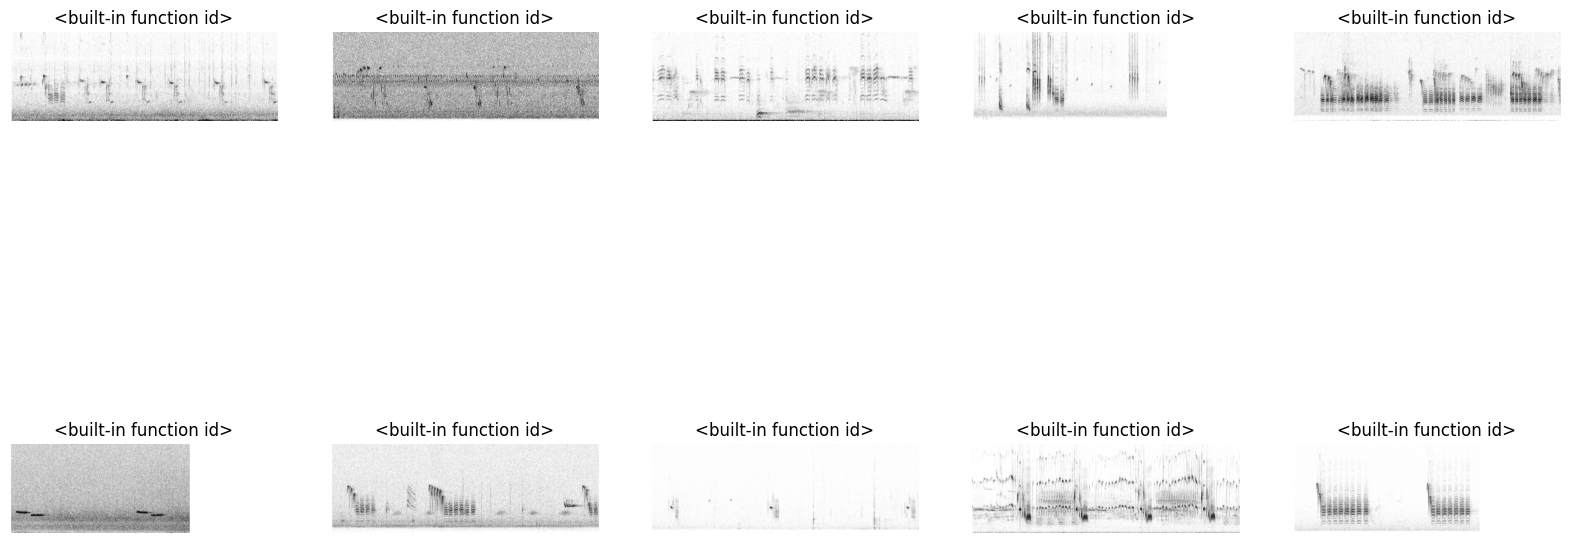

In [106]:
plot_sono_grid(filt_df.id[0:10].values,2,5)

In [107]:
df['tmstmp'] = pd.to_datetime((df.loc[:,'date'] + ' ' + filt_df.loc[:,'time']), errors='coerce', format='%Y-%m-%d %H:%M')

In [99]:
# Set the df index to a Timestamp object for efficient time-based querying
df.set_index(pd.DatetimeIndex(filt_df['tmstmp']), inplace=True)


,id,gen,sp,ssp,en,rec,cnt,loc,lat,lng,...,length,time,date,uploaded,also,rmk,bird-seen,playback-used,has_call,tmstmp
tmstmp,,,,,,,,,,,,,,,,,,,,,
2020-08-02 12:07:00,609196,Poecile,atricapillus,NaN,Black-capped Chickadee,Sue Riffe,United States,"Lyons, Boulder County, Colorado",40.228600,-105.290300,...,0:11,12:07,2020-08-02,2020-12-15,['Selasphorus platycercus'],"Calls of Chick-a-dee-dee and see che-up, calli...",yes,no,1,2020-08-02 12:07:00
2020-09-25 08:00:00,590964,Poecile,atricapillus,NaN,Black-capped Chickadee,William Whitehead,United States,"Sandy Hook, Monmouth Co., NJ",40.451000,-73.996000,...,0:12,08:00,2020-09-25,2020-09-25,[''],Maritime Forest,yes,no,1,2020-09-25 08:00:00
2020-07-13 20:20:00,582380,Poecile,atricapillus,NaN,Black-capped Chickadee,James Link,United States,"Quilcene, Jefferson County, Washington",47.858900,-122.811500,...,0:18,20:20,2020-07-13,2020-08-14,[''],habitat tidal mudflat. the tide was out at the...,yes,no,1,2020-07-13 20:20:00
2016-11-24 12:30:00,394059,Poecile,atricapillus,NaN,Black-capped Chickadee,Dominic Garcia-Hall,United States,"Secaucus, Hudson County, New Jersey",40.795800,-74.049200,...,0:07,12:30,2016-11-24,2017-11-24,['Mimus polyglottos'],NaN,yes,no,1,2016-11-24 12:30:00
2015-08-25 09:30:00,388592,Poecile,atricapillus,NaN,Black-capped Chickadee,Antonio Xeira,United States,"Bald Mountain Park, North RA, Oakland County, MI",42.789500,-83.190400,...,0:15,09:30,2015-08-25,2017-10-05,[''],Big group calling.\r\n\r\nEditing: High-pass f...,no,no,1,2015-08-25 09:30:00
2015-04-21 14:27:00,361834,Poecile,atricapillus,garrinus,Black-capped Chickadee,Frank Lambert,United States,"Black Canyon of the Gunnison River, Gunnison C...",38.542000,-107.687800,...,0:06,14:27,2015-04-21,2017-03-28,[''],NaN,yes,unknown,1,2015-04-21 14:27:00
2016-04-18 17:30:00,313739,Poecile,atricapillus,NaN,Black-capped Chickadee,Antonio Xeira,United States,"Cranberry Lake Park, Oakland County, Michigan",42.786500,-83.145900,...,0:11,17:30,2016-04-18,2016-04-25,[''],NaN,yes,no,1,2016-04-18 17:30:00
2016-02-17 13:00:00,304269,Poecile,atricapillus,NaN,Black-capped Chickadee,Antonio Xeira,United States,"Basnau Rd, Chippewa County, Michigan",46.318200,-85.173800,...,0:13,13:00,2016-02-17,2016-02-22,[''],"Call from inside the wood, never saw the bird....",no,no,1,2016-02-17 13:00:00
2011-04-23 06:00:00,76509,Poecile,atricapillus,occidentalis,Black-capped Chickadee,Andrew Spencer,United States,"Brier, Snohomish Co., Washington",47.783900,-122.273900,...,0:16,06:00,2011-04-23,2011-04-25,[''],natural vocalization; high pitched agitation c...,unknown,unknown,1,2011-04-23 06:00:00
